In [62]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
import numpy as np
import pandas as pd
import pickle as pkl

In [2]:
with open("brown_cn_new.pkl", "rb") as infile:
    cn_gold = pkl.load(infile)

In [3]:
def get_gold_wn(w):
    gold = []
    for syn in wordnet.synsets(w) :
        for l in syn.lemmas() :
            gold.append(l.name())
    gold = set(gold)
    gold.add(w)
    return gold

In [39]:
smile_wn = get_gold_wn("sword")
smile_cn = cn_gold_new['sword']
both = smile_wn.intersection(smile_cn)
s_wn = smile_wn - smile_cn
s_cn = smile_cn - smile_wn

In [42]:
sent = ""
for w in s_cn:
    sent += w + ", "
sent

'tuck, swordbearing, swordplay, buckler, scramasax, sheath, coulisse, toadsticker, rapper, bastard, badelaire, matachin, swordswomanship, langet, fencing, dah, menuki, allonge, suit, swordcraft, swordmaker, accollé, scimitar, swordfighter, odachi, sabre, caveating, estramacon, warrior, shinai, kopis, kissaki, dagger, gatka, card, swords, kris, swordster, xiphoid, braquemard, shabble, iaido, xiphophyllous, slice, stramazoun, knifeplay, ensiferous, espadon, unsworded, schiavona, machete, shield, zweihänder, swordsman, rapier, falchion, khopesh, curtana, hilt, forte, ricasso, broadsword, brandiron, kirpan, furbisher, pommel, toledo, whinyard, chape, epee, swordsmith, heraldry, degen, gladial, sharp, falx, edge, belt, longsword, faena, macharomancy, swordmaking, urumi, shiny, ensate, sax, swordpoint, xiphos, uchigatana, lay, swordlike, kindjal, loom, makhaira, swordproof, fish, pell, cinquedea, pilcher, point, swordsmithing, swordfight, macana, brond, long, gladiate, morglay, backsword, me

In [26]:
sent = ""
for w in get_gold_wn("blue"):
    sent += w + ", "
sent

'profane, downhearted, aristocratical, patrician, dark, drab, racy, wild_blue_yonder, bluish, risque, dispirited, drear, amobarbital_sodium, blasphemous, naughty, dingy, blue_devil, low, grim, downcast, bluing, depressed, down_in_the_mouth, blueness, Amytal, gamy, blueish, blue_angel, blue_air, sorry, blueing, disconsolate, dismal, low-spirited, blue, puritanic, down, blue-blooded, aristocratic, spicy, gentle, blue_sky, gloomy, puritanical, dreary, juicy, gamey, '

In [25]:
sent = ""
for w in cn_gold_new['blue']:
    sent += w + ", "
sent

'profane, royal, blow, urocyanin, calypso, shibuichi, cyanometer, caesious, baby, zaffre, democratic, windows, associate, bluebell, bice, lazuline, bluish, flame, violet, magenta, violets, velvet, shiver, green, vishnu, sad, bluewash, rhapsody, hues, aqua, nonblue, roller, bluey, red, ultramarine, watchet, pyocyanic, azureous, robins, colour, ozone, rare, moo, pearly, literary, factory, sky, bluefin, bluepoint, sadness, genipocyanin, pornographic, noble, blueing, ao, bluen, triad, salamstone, bluewards, white, flute, benitoite, melancholic, indicolite, skies, fifth, acyanopia, unblue, flag, quark, shade, blueward, colors, bluestocking, lycaenidae, azure, dihydroethidium, larkspur, dungaree, cupredoxin, dark, shock, smoke, gray, before, boy, main, plan, threw, other, orchid, bluestockinged, and, tristimulus, crayons, cross, teal, boys, butterfly, ravenclaw, blueberried, bluing, cloud, bluefaced, stilton, cyanosis, first, observation, smurfy, purple, yellow, blueberries, azuline, bluenes

In [65]:
arr1 = arr2 = [1, 2, 3]
np.mean([arr1, arr2], axis=0)

array([1., 2., 3.])

In [7]:
with open("kmeans_clusters_cn_glove_1.pkl", "rb") as infile:
    kmeans_clusters_cn = pkl.load(infile)

In [69]:
words = []
words_idx = []
clusters = []
for cluster_idx in kmeans_clusters_cn :
    precision_wn, recall_wn, precision_cn, recall_cn = [], [], [], []
    cluster = kmeans_clusters_cn[cluster_idx]
    for word in cluster :
        gold_wn = get_gold_wn(word)
        gold_cn = cn_gold[word]
        gold_cn.add(word)
        
        true_positive_wn = len(cluster.intersection(gold_wn))
        false_positive_wn = len(cluster - gold_wn)
        false_negative_wn = len(gold_wn - cluster)
        p_wn = true_positive_wn / (true_positive_wn + false_positive_wn)
        r_wn = true_positive_wn / (true_positive_wn + false_negative_wn)
        precision_wn.append(p_wn)
        recall_wn.append(r_wn)
        
        
        true_positive_cn = len(cluster.intersection(gold_cn))
        false_positive_cn = len(cluster - gold_cn)
        false_negative_cn = len(gold_cn - cluster)
        p_cn = true_positive_cn / (true_positive_cn + false_positive_cn)
        r_cn = true_positive_cn / (true_positive_cn + false_negative_cn)
        precision_cn.append(p_cn)
        recall_cn.append(r_cn)
        
        words_idx.append(word)
        words.append({"precision_wn" : p_wn, "recall_wn" : r_wn, "precision_cn" : p_cn, "recall_cn" : r_cn})
        
    clusters.append({"precision_wn" : np.mean(precision_wn),
                     "recall_wn" : np.mean(recall_wn),
                     "precision_cn" : np.mean(precision_cn),
                     "recall_cn" : np.mean(recall_cn)})

In [70]:
df_words = pd.DataFrame(words, index=words_idx)
df_clusters = pd.DataFrame(clusters)

In [92]:
df_clusters.loc[10]

precision_wn    0.099174
recall_wn       0.234681
precision_cn    0.206612
recall_cn       0.025605
Name: 10, dtype: float64

In [93]:
kmeans_clusters_cn[10]

{'a',
 'as',
 'ate',
 'block',
 'continue',
 'for',
 'prepare',
 'role',
 'serve',
 'show',
 'to'}

In [81]:
df_words.loc['camera']

precision_wn    0.100000
recall_wn       0.250000
precision_cn    0.200000
recall_cn       0.013158
Name: camera, dtype: float64

In [61]:
kmeans_clusters_cn[6] - get_gold_wn('apple')

{'blackberry',
 'camera',
 'flash',
 'led',
 'messenger',
 'notebook',
 'opera',
 'telephone',
 'windows'}

In [24]:
get_gold_wn("blackberry")

{'blackberry', 'blackberry_bush'}

In [33]:
camera = cn_gold['camera'].add('camera')

In [35]:
kmeans_clusters_cn[6].intersection(cn_gold['camera'])

{'camera', 'flash'}

In [59]:
len(kmeans_clusters_cn[6] - cn_gold['camera'])

8

In [86]:
lens = []
sizes = []
clusters = []
for cluster in kmeans_clusters_cn:
    lens.append((len(kmeans_clusters_cn[cluster]), cluster))
    sizes.append(len(kmeans_clusters_cn[cluster]))
    clusters.append(cluster)

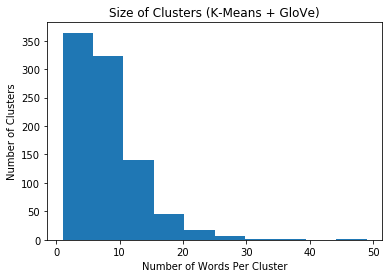

In [102]:
plt.hist(sizes)
plt.title("Size of Clusters (K-Means + GloVe)")
plt.xlabel("Number of Words Per Cluster")
plt.ylabel("Number of Clusters")
plt.show()

In [100]:
histo = []
for x in range(49):
    histo.append((x, sizes.count(x)))
histo

[(0, 0),
 (1, 40),
 (2, 83),
 (3, 78),
 (4, 85),
 (5, 78),
 (6, 83),
 (7, 65),
 (8, 71),
 (9, 53),
 (10, 51),
 (11, 43),
 (12, 33),
 (13, 28),
 (14, 15),
 (15, 22),
 (16, 15),
 (17, 7),
 (18, 10),
 (19, 9),
 (20, 4),
 (21, 7),
 (22, 4),
 (23, 4),
 (24, 3),
 (25, 0),
 (26, 2),
 (27, 2),
 (28, 0),
 (29, 2),
 (30, 1),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 0),
 (38, 0),
 (39, 1),
 (40, 0),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0)]

In [99]:
sorted(lens)

[(1, 1),
 (1, 4),
 (1, 5),
 (1, 18),
 (1, 31),
 (1, 42),
 (1, 63),
 (1, 78),
 (1, 89),
 (1, 121),
 (1, 173),
 (1, 236),
 (1, 256),
 (1, 263),
 (1, 266),
 (1, 295),
 (1, 326),
 (1, 329),
 (1, 347),
 (1, 415),
 (1, 422),
 (1, 427),
 (1, 513),
 (1, 525),
 (1, 552),
 (1, 561),
 (1, 573),
 (1, 680),
 (1, 689),
 (1, 706),
 (1, 755),
 (1, 758),
 (1, 781),
 (1, 828),
 (1, 833),
 (1, 865),
 (1, 894),
 (1, 895),
 (1, 896),
 (1, 899),
 (2, 21),
 (2, 27),
 (2, 33),
 (2, 34),
 (2, 36),
 (2, 45),
 (2, 49),
 (2, 52),
 (2, 66),
 (2, 75),
 (2, 76),
 (2, 81),
 (2, 91),
 (2, 98),
 (2, 110),
 (2, 129),
 (2, 135),
 (2, 136),
 (2, 138),
 (2, 148),
 (2, 157),
 (2, 161),
 (2, 164),
 (2, 178),
 (2, 195),
 (2, 207),
 (2, 241),
 (2, 258),
 (2, 270),
 (2, 275),
 (2, 282),
 (2, 308),
 (2, 313),
 (2, 340),
 (2, 343),
 (2, 349),
 (2, 354),
 (2, 372),
 (2, 379),
 (2, 391),
 (2, 405),
 (2, 441),
 (2, 449),
 (2, 469),
 (2, 470),
 (2, 481),
 (2, 485),
 (2, 493),
 (2, 507),
 (2, 532),
 (2, 544),
 (2, 553),
 (2, 556),
 (2

In [98]:
kmeans_clusters_cn[173]

{'triangle'}